In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import scipy.stats as sts
#from scipy.stats import linregress
from pprint import pprint
#import warnings
#warnings.filterwarnings('ignore')
#import ipywidgets as widgets
%matplotlib inline


In [23]:
#%pip install citipy

In [24]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [25]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


628

In [26]:
##cityurl = "http://api.openweathermap.org/data/2.5/weather?"
#city = "london" 
#Parameter for the API call
##api_key_weather = "ce3f01dd4d23d07b4cfb5ca82f3ea6e5"
##parameters={'appid':api_key_weather, "units":"imperial"}
##results = []
#contentType ='json'
#loop through the list of cities and perform a request for weather data for each city
##for city in cities:
    ##parameters['q']=city
    ##response = requests.get(cityurl, params=parameters)
    ##weatherjson=response.json()
    ##if weatherjson['cod']==200:
        ##results.append(response)
    ##else:
        ##if weatherjson['cod']==404:
            ##print('Data not available')

##time.sleep(5)
#display(results)

In [27]:
#set up list to hold response info
results = []
counter = 0
cityurl = "http://api.openweathermap.org/data/2.5/weather?"
#city = "london" 
api_key_weather = "ce3f01dd4d23d07b4cfb5ca82f3ea6e5"
parameters={'appid':api_key_weather, "units":"imperial"}


for city in cities:
    parameters['q']=city
    response = requests.get(cityurl, params=parameters).json()

    #try/except statement to handle errors when city is not found on openweather site
    try:
        #create dictionary
        city_data = {
            "City": response['name'],
            "Lat": response['coord']['lat'],
            "Lng": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
        }
        results.append(city_data)
        counter = counter + 1
        print(f"{counter} City Name: {response['name']} / ID:{response['id']}")
    except:
        print("Missing city | " + city)
#city_weather

1 City Name: Olafsvik / ID:3414079
2 City Name: Zunyi / ID:1783621
3 City Name: Albany / ID:5106841
4 City Name: Ofakim / ID:293992
5 City Name: Leshukonskoye / ID:535839
6 City Name: Nome / ID:5870133
7 City Name: Castro / ID:3466704
8 City Name: Hay River / ID:5972762
9 City Name: Ossora / ID:2122389
10 City Name: Ushuaia / ID:3833367
11 City Name: Vernon / ID:6173864
12 City Name: Guasdualito / ID:3804949
13 City Name: La Ronge / ID:6050066
14 City Name: Kruisfontein / ID:986717
Missing city | nizhneyansk
Missing city | attawapiskat
15 City Name: Chinsali / ID:918905
16 City Name: Punta Arenas / ID:3874787
17 City Name: Port Alfred / ID:964432
18 City Name: Rikitea / ID:4030556
19 City Name: Inhambane / ID:1045114
20 City Name: Bluff / ID:2206939
21 City Name: Tanout / ID:2439155
22 City Name: Kapaa / ID:5848280
23 City Name: Atuona / ID:4020109
24 City Name: Tessalit / ID:2449893
25 City Name: Kalmunai / ID:1242110
26 City Name: Shimoda / ID:1852357
27 City Name: Puerto Ayora / ID:

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [ ]:

# latitude=[response.get('coord').get('lat') for response in results]
# longitude=[response.get('coord').get('lon') for response in results]
# Country=[response.get('sys').get('country') for response in results]
# Date=[response.get('dt') for response in results]
# Temperature=[response.get('main').get('temp_max') for response in results]
# Humidity=[response.get('main').get('humidity') for response in results]
# Cloudiness=[response.get('clouds').get('all') for response in results]
# Wind_Speed=[response.get('wind').get('speed') for response in results]
# city=[response.get('name') for response in results]


In [7]:
# # Create a DataFrame.
city_df = pd.DataFrame(results)
city_df
# write to output file
city_df.to_csv("weatherhome.csv", index=False)                      

In [8]:
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kemijärvi,66.7131,27.4306,20.39,93,79,10.87,FI,1613164293
1,Kaeo,-35.1000,173.7833,65.77,62,0,6.51,NZ,1613164293
2,Mataura,-46.1927,168.8643,57.00,88,100,1.01,NZ,1613163643
3,Yangi Marg`ilon,40.4272,71.7189,48.20,46,100,6.91,UZ,1613164099
4,Yulara,-25.2406,130.9889,62.60,82,90,16.11,AU,1613164293
...,...,...,...,...,...,...,...,...,...
568,Sechura,-5.5569,-80.8222,83.21,58,66,16.53,PE,1613164465
569,Khandyga,62.6667,135.6000,-0.09,86,77,3.67,RU,1613164465
570,Thunder Bay,48.4001,-89.3168,3.99,46,20,9.22,CA,1613164403
571,Mahon,39.8885,4.2658,53.60,87,20,9.22,ES,1613164174


The scatter plot vvvvvv


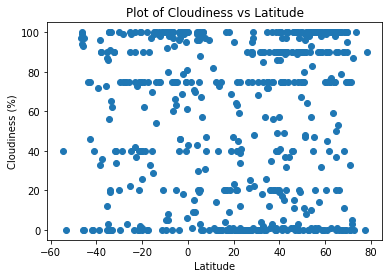

In [9]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.title('Plot of Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print("The scatter plot vvvvvv")

The scatter plot vvvvvv


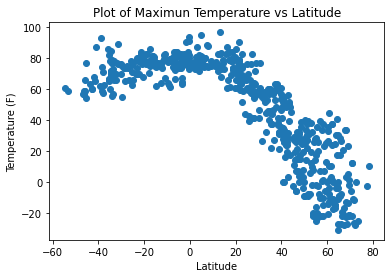

In [10]:
plt.scatter(city_df["Lat"], city_df["Max Temp"])
plt.title('Plot of Maximun Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print("The scatter plot vvvvvv")

The scatter plot vvvvvv


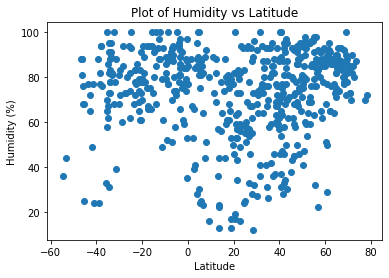

In [11]:
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.title('Plot of Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print("The scatter plot vvvvvv")

The scatter plot vvvvvv


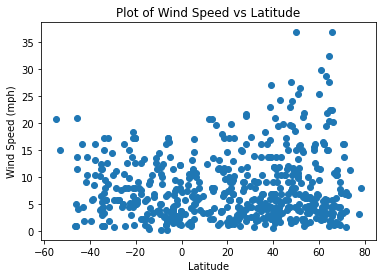

In [12]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"])
plt.title('Plot of Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print("The scatter plot vvvvvv")

In [48]:
northhemisp=city_df.loc[city_df["Lat"]>0]
northhemisp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kemijärvi,66.7131,27.4306,20.39,93,79,10.87,FI,1613164293
3,Yangi Marg`ilon,40.4272,71.7189,48.20,46,100,6.91,UZ,1613164099
7,Bathsheba,13.2167,-59.5167,82.40,57,40,20.71,BB,1613163810
8,Hilo,19.7297,-155.0900,80.60,50,1,4.61,US,1613163760
10,San Cristobal,7.7669,-72.2250,87.80,51,40,9.22,VE,1613163651
...,...,...,...,...,...,...,...,...,...
567,Arlit,18.7369,7.3853,73.74,17,0,11.74,NE,1613164464
569,Khandyga,62.6667,135.6000,-0.09,86,77,3.67,RU,1613164465
570,Thunder Bay,48.4001,-89.3168,3.99,46,20,9.22,CA,1613164403
571,Mahon,39.8885,4.2658,53.60,87,20,9.22,ES,1613164174


In [34]:
southhemisp=city_df.loc[city_df["Lat"]<0]
southhemisp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kaeo,-35.1000,173.7833,65.77,62,0,6.51,NZ,1613164293
2,Mataura,-46.1927,168.8643,57.00,88,100,1.01,NZ,1613163643
4,Yulara,-25.2406,130.9889,62.60,82,90,16.11,AU,1613164293
5,Saint-Philippe,-21.3585,55.7679,80.60,65,20,18.41,RE,1613163652
6,Rikitea,-23.1203,-134.9692,80.06,72,42,9.84,PF,1613163645
...,...,...,...,...,...,...,...,...,...
550,Maningrida,-12.0667,134.2667,77.74,88,98,6.44,AU,1613164460
552,Cap Malheureux,-19.9842,57.6142,77.00,79,1,5.01,MU,1613164460
557,São João da Barra,-21.6403,-41.0511,78.80,78,0,13.80,BR,1613164461
560,São José da Coroa Grande,-8.8978,-35.1478,79.59,77,5,10.58,BR,1613164462


The correlation coeficient r for Maximum TEMPERATURE (N) is: -0.8760620452650562
The correlation coeficient r for HUMIDITY (N) is: 0.32324681634151375
The correlation coeficient r for CLOUDINESS (N) is: 0.2329004400255062
The correlation coeficient r for WIND SPEED (N) is: 0.0803338788563117
The correlation coeficient r for Maximum TEMPERATURE (S) is: 0.5142674571161968
The correlation coeficient r for HUMIDITY (S) is: 0.25698798763341907
The correlation coeficient r for CLOUDINESS (S) is: 0.23352104084775066
The correlation coeficient r for WIND SPPED (S) is: -0.20070585873515362


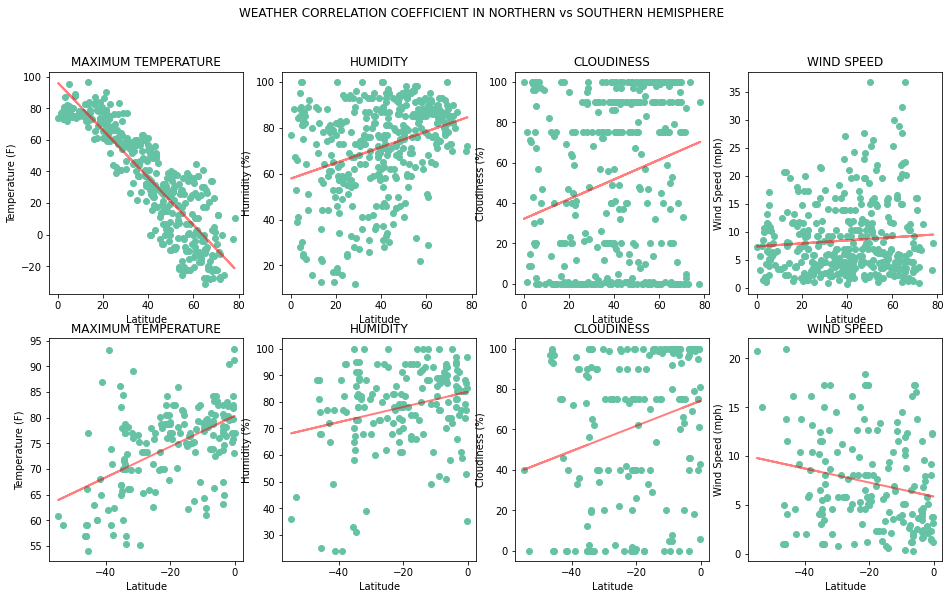

In [55]:
# Run linear regression on each relationship: 
fig,ax = plt.subplots(2,4, figsize=(16,9))
fig.suptitle('WEATHER CORRELATION COEFFICIENT IN NORTHERN vs SOUTHERN HEMISPHERE')

#NORTHERN HEMISPHERE:
#Northen Hemisphere- Temperature(F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Max Temp'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][0].scatter(northhemisp['Lat'], northhemisp['Max Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][0].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][0].title.set_text('MAXIMUM TEMPERATURE')
ax[0][0].set_ylabel('Temperature (F)')
ax[0][0].set_xlabel('Latitude')
print("The correlation coeficient r for Maximum TEMPERATURE (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Max Temp'])[0]))

#Northen Hemisphere- Humidity(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Humidity'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][1].scatter(northhemisp['Lat'], northhemisp['Humidity'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][1].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][1].title.set_text('HUMIDITY')
ax[0][1].set_ylabel('Humidity (%)')
ax[0][1].set_xlabel('Latitude')
print("The correlation coeficient r for HUMIDITY (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Humidity'])[0]))

#Northen Hemisphere- Cloudiness(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Cloudiness'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][2].scatter(northhemisp['Lat'], northhemisp['Cloudiness'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][2].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][2].title.set_text('CLOUDINESS')
ax[0][2].set_ylabel('Cloudiness (%)')
ax[0][2].set_xlabel('Latitude')
print("The correlation coeficient r for CLOUDINESS (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Cloudiness'])[0]))

#Northen Hemisphere- wind Speed(mph) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Wind Speed'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][3].scatter(northhemisp['Lat'], northhemisp['Wind Speed'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][3].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][3].title.set_text('WIND SPEED')
ax[0][3].set_ylabel('Wind Speed (mph)')
ax[0][3].set_xlabel('Latitude')
print("The correlation coeficient r for WIND SPEED (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Wind Speed'])[0]))

#SOUTHERN HEMISPHERE
#Southern Hemisphere - Temperature(F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Max Temp'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][0].scatter(southhemisp['Lat'], southhemisp['Max Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][0].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][0].title.set_text('MAXIMUM TEMPERATURE')
ax[1][0].set_ylabel('Temperature (F)')
ax[1][0].set_xlabel('Latitude')
print("The correlation coeficient r for Maximum TEMPERATURE (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Max Temp'])[0]))

#Southern Hemisphere - Humidity(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Humidity'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][1].scatter(southhemisp['Lat'], southhemisp['Humidity'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][1].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][1].title.set_text('HUMIDITY')
ax[1][1].set_ylabel('Humidity (%)')
ax[1][1].set_xlabel('Latitude')
print("The correlation coeficient r for HUMIDITY (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Humidity'])[0]))

#Southern Hemisphere - Cloudiness(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Cloudiness'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][2].scatter(southhemisp['Lat'], southhemisp['Cloudiness'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][2].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][2].title.set_text('CLOUDINESS')
ax[1][2].set_ylabel('Cloudiness (%)')
ax[1][2].set_xlabel('Latitude')
print("The correlation coeficient r for CLOUDINESS (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Cloudiness'])[0]))

#Southern Hemisphere - wind Speed(mph) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Wind Speed'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][3].scatter(southhemisp['Lat'], southhemisp['Wind Speed'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][3].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][3].title.set_text('WIND SPEED')
ax[1][3].set_ylabel('Wind Speed (mph)')
ax[1][3].set_xlabel('Latitude')
print("The correlation coeficient r for WIND SPPED (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Wind Speed'])[0]))
